<a href="https://colab.research.google.com/github/JLDaniel77/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/LS_DS_223_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

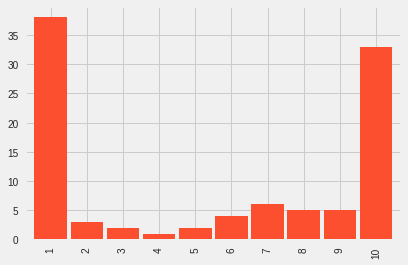

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

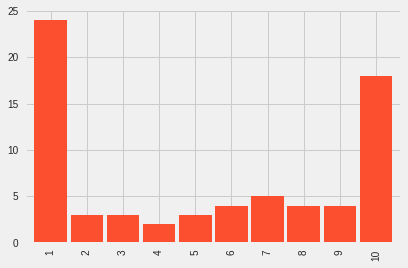

In [3]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

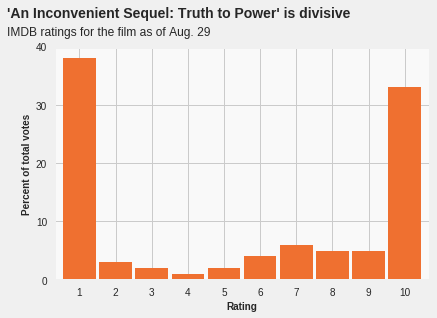

In [17]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='#ef7030', width=0.9);

ax.set(yticks=range(0, 50, 10),
      facecolor='#f9f9f9')

# Not quite right
# plt.title("'An Inconvenient Sequel: Truth to Power' is divisive")
plt.ylabel('Percent of total votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=14, fontweight='bold');
ax.text(x=-2, y=42, s="IMDB ratings for the film as of Aug. 29",
       fontsize=12);
ax.tick_params(labelrotation=0)

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [19]:
df.shape

(80053, 27)

In [0]:
pd.set_option('display.max_columns', 500)

In [24]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [26]:
df.sample(1).T

,45035
timestamp,2017-08-17 04:00:06.146857
respondents,2344
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.2
mean,5.5
median,6
1_votes,959
2_votes,62
3_votes,39


In [27]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [29]:
df['timestamp'].head()

0   2017-07-17 12:28:32.785639
1   2017-07-17 12:28:33.025600
2   2017-07-17 12:28:33.273919
3   2017-07-17 12:28:33.495325
4   2017-07-17 12:28:33.722849
Name: timestamp, dtype: datetime64[ns]

In [0]:
df.set_index('timestamp', inplace=True)

In [35]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [36]:
df['category'].value_counts()

Females               4216
Females Aged 30-44    4216
Males                 4216
IMDb staff            4216
Aged under 18         4216
Top 1000 voters       4216
Males Aged 18-29      4216
Males under 18        4216
IMDb users            4216
Females Aged 45+      4216
US users              4216
Males Aged 45+        4216
Non-US users          4216
Aged 18-29            4216
Males Aged 30-44      4216
Aged 30-44            4216
Aged 45+              4216
Females Aged 18-29    4216
Females under 18      4165
Name: category, dtype: int64

In [0]:
lastday = df['2017-08-29']

In [38]:
lastday[lastday['category'] == 'IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:50:05.826082,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:00:05.483262,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:10:06.038644,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:20:05.807155,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


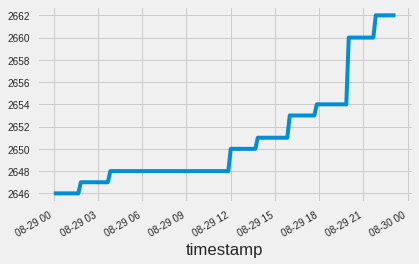

In [39]:
lastday[lastday['category'] =='IMDb users'].respondents.plot()

In [0]:
final = lastday[lastday['category'] == 'IMDb users'].tail(1)

In [41]:
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [42]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
              '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [44]:
data = final[pct_columns].T
data.index = range(1, 11)
data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


<Figure size 432x288 with 0 Axes>

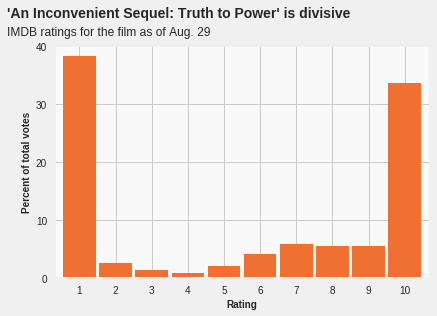

In [46]:
plt.style.use('fivethirtyeight')
fig = plt.figure()

ax = data.plot.bar(color='#ef7030', width=0.9);

ax.set(yticks=range(0, 50, 10),
      facecolor='#f9f9f9');
fig.patch.set_facecolor('#f9f9f9');

# Not quite right
# plt.title("'An Inconvenient Sequel: Truth to Power' is divisive")
plt.ylabel('Percent of total votes', fontsize=10, fontweight='bold');
plt.xlabel('Rating', fontsize=10, fontweight='bold');

ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=14, fontweight='bold');
ax.text(x=-2, y=42, s="IMDB ratings for the film as of Aug. 29",
       fontsize=12);
ax.tick_params(labelrotation=0);

ax.get_legend().remove()

In [47]:
# checking out Altair
import altair as alt
from vega_datasets import data

source = data.movies.url

alt.Chart(source).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)

Chart({
  data: 'https://vega.github.io/vega-datasets/data/movies.json',
  encoding: EncodingWithFacet({
    x: X({
      bin: True,
      shorthand: 'IMDB_Rating:Q'
    }),
    y: Y({
      shorthand: 'count()'
    })
  }),
  mark: 'bar'
})

In [48]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
).interactive()

RepeatChart({
  repeat: Repeat({
    column: ['Miles_per_Gallon', 'Acceleration', 'Horsepower'],
    row: ['Horsepower', 'Acceleration', 'Miles_per_Gallon']
  }),
  spec: Chart({
    data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
    0            12.0          8         307.0       130.0              18.0   
    1            11.5          8         350.0       165.0              15.0   
    2            11.0          8         318.0       150.0              18.0   
    3            12.0          8         304.0       150.0              16.0   
    4            10.5          8         302.0       140.0              17.0   
    5            10.0          8         429.0       198.0              15.0   
    6             9.0          8         454.0       220.0              14.0   
    7             8.5          8         440.0       215.0              14.0   
    8            10.0          8         455.0       225.0              14.0   
    9             8.5          8         390.0       190.0              15.0   
    10           17.5          4         133.0       115.0               NaN   
    11           11.5          8         350.0       165.0               NaN   
    12           11.0          8         351.0       153.0               NaN   
    13           10.5          8         383.0       175.0               NaN   
    14           11.0          8         360.0       175.0               NaN   
    15           10.0          8         383.0       170.0              15.0   
    16            8.0          8         340.0       160.0              14.0   
    17            8.0          8         302.0       140.0               NaN   
    18            9.5          8         400.0       150.0              15.0   
    19           10.0          8         455.0       225.0              14.0   
    20           15.0          4         113.0        95.0              24.0   
    21           15.5          6         198.0        95.0              22.0   
    22           15.5          6         199.0        97.0              18.0   
    23           16.0          6         200.0        85.0              21.0   
    24           14.5          4          97.0        88.0              27.0   
    25           20.5          4          97.0        46.0              26.0   
    26           17.5          4         110.0        87.0              25.0   
    27           14.5          4         107.0        90.0              24.0   
    28           17.5          4         104.0        95.0              25.0   
    29           12.5          4         121.0       113.0              26.0   
    ..            ...        ...           ...         ...               ...   
    376          18.6          4         112.0        88.0              27.0   
    377          18.0          4         112.0        88.0              34.0   
    378          16.2          4         112.0        85.0              31.0   
    379          16.0          4         135.0        84.0              29.0   
    380          18.0          4         151.0        90.0              27.0   
    381          16.4          4         140.0        92.0              24.0   
    382          20.5          4         151.0         NaN              23.0   
    383          15.3          4         105.0        74.0              36.0   
    384          18.2          4          91.0        68.0              37.0   
    385          17.6          4          91.0        68.0              31.0   
    386          14.7          4         105.0        63.0              38.0   
    387          17.3          4          98.0        70.0              36.0   
    388          14.5          4         120.0        88.0              36.0   
    389          14.5          4         107.0        75.0              36.0   
    390          16.9          4         108.0        70.0              34.0   
    391          15.0          4          91.0        6

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [0]:
url = 'http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv'

women_majors = pd.read_csv(url)

In [57]:
women_majors.shape

(42, 18)

In [58]:
women_majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

In [59]:
women_majors.describe()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1990.500000,33.848165,33.685540,61.100000,49.429864,40.653471,56.216667,25.809524,76.356236,12.892857,66.186680,71.723810,82.983333,44.478571,31.304762,68.776190,76.085714,45.407143
std,12.267844,12.552731,9.574057,1.305336,10.087725,13.116109,8.698610,6.688753,2.212641,5.670824,1.950990,1.926682,2.914967,2.646262,9.000866,9.705463,5.879504,4.763653
min,1970.000000,4.229798,11.921005,58.600000,29.088363,9.064439,35.300000,13.600000,72.166525,0.800000,61.647206,69.000000,75.500000,38.000000,13.800000,44.400000,62.600000,36.100000
25%,1980.250000,30.840814,28.520709,60.200000,44.311821,37.390851,55.125000,19.125000,74.994573,10.625000,65.583807,70.125000,81.825000,42.875000,24.875000,65.550000,74.625000,43.825000
50%,1990.500000,33.317552,35.994852,61.300000,50.971469,47.210123,59.850000,27.300000,75.937020,14.100000,66.112018,71.150000,83.700000,44.900000,32.100000,72.750000,77.450000,45.300000
75%,2000.750000,45.663953,40.790605,62.000000,58.679194,48.876139,62.125000,29.775000,78.619420,16.950000,67.861247,73.875000,85.175000,46.500000,40.200000,76.925000,81.100000,49.375000
max,2011.000000,50.037182,44.499331,63.400000,62.169456,50.552335,64.600000,37.100000,79.618625,19.000000,68.894487,75.300000,86.500000,48.300000,42.200000,77.800000,82.100000,51.800000


In [60]:
women_majors.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [61]:
women_majors.tail()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
37,2007,47.605026,43.100459,61.4,59.411993,49.000459,62.5,17.6,78.721413,16.8,67.874923,70.2,85.4,44.1,40.7,77.1,82.1,49.3
38,2008,47.570834,42.711730,60.7,59.305765,48.888027,62.4,17.8,79.196327,16.5,67.594028,70.2,85.2,43.3,40.7,77.2,81.7,49.4
39,2009,48.667224,43.348921,61.0,58.489583,48.840474,62.8,18.1,79.532909,16.8,67.969792,69.3,85.1,43.3,40.7,77.1,82.0,49.4
40,2010,48.730042,42.066721,61.3,59.010255,48.757988,62.5,17.6,79.618625,17.2,67.928106,69.0,85.0,43.1,40.2,77.0,81.7,49.3
41,2011,50.037182,42.773438,61.2,58.742397,48.180418,62.2,18.2,79.432812,17.5,68.426730,69.5,84.8,43.1,40.1,76.7,81.9,49.2


In [62]:
under_20 = women_majors.loc[0, women_majors.loc[0] < 20]
under_20

Agriculture           4.229798
Architecture         11.921005
Business              9.064439
Computer Science     13.600000
Engineering           0.800000
Physical Sciences    13.800000
Name: 0, dtype: float64

In [0]:
import matplotlib.style as style
import warnings

warnings.filterwarnings('ignore')

style.use('fivethirtyeight')

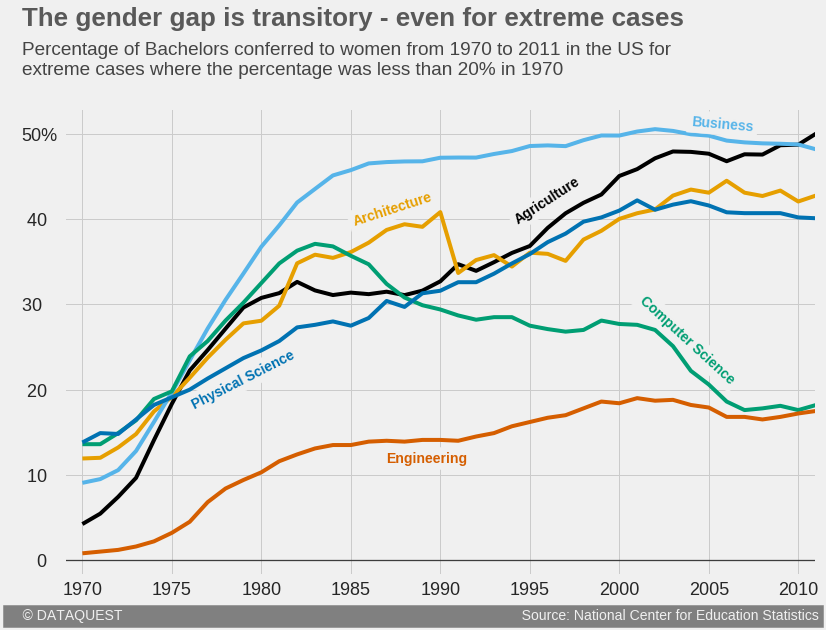

In [109]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

ax = women_majors.plot(x='Year', y=under_20.index, figsize=(12, 8), color=colors, legend=False);
ax.tick_params(axis='both', which='major', labelsize=18);

# Customizing the ytick labels
ax.set_yticklabels(labels = [-10, '0  ', '10  ', '20  ', '30   ', '40  ', '50%']);

# Generated bolded horizon line at y = 0
ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7);

# Changed range of the x-axis
ax.set_xlim(left=1969, right=2011)

# Remove the label of the x-axis
ax.xaxis.label.set_visible(False)

# Create signiture bar
ax.text(x = 1965.8, y = -7,
              s='    © DATAQUEST                                                                                                       Source: National Center for Education Statistics',
              fontsize=14, color='#f0f0f0', backgroundcolor = 'grey');

# Adding title and subtitle
ax.text(x=1966.65, y=62.7, s="The gender gap is transitory - even for extreme cases",
              fontsize=26, weight='bold', alpha=0.75)
ax.text(x=1966.65, y=57, 
              s="Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970",
                fontsize=19, alpha=0.85);

# Adding color labels
ax.text(x=1994, y=44, s='Agriculture', color=colors[0], weight='bold', rotation=33,
              backgroundcolor='#f0f0f0');
ax.text(x=1985, y=42.2, s='Architecture', color=colors[1], weight='bold', rotation=18,
              backgroundcolor='#f0f0f0');
ax.text(x=2004, y=51, s='Business', color=colors[2], weight='bold', rotation=-5,
              backgroundcolor='#f0f0f0');
ax.text(x=2001, y=30, s='Computer Science', color=colors[3], weight='bold', rotation=-42.5,
              backgroundcolor='#f0f0f0');
ax.text(x=1987, y=11.5, s='Engineering', color=colors[4], weight='bold',
              backgroundcolor='#f0f0f0');
ax.text(x=1976, y=23.65, s='Physical Science', color=colors[5], weight='bold', rotation=27,
              backgroundcolor='#f0f0f0');